In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('gurgaon_properties_cleaned_v2.csv').drop_duplicates()

In [4]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,not available,2.0,NaN,New Property,"['Sector 55-56 Metro Station', 'The Leaf Mall ...",NaN,"['Lift(s)', 'Park']",1081.0,NaN,650.0,0,0,0,0,0,1
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,"study room,servant room",4.0,NaN,New Property,"['Sant Soordas Sihi Metro Station', 'Airia Mal...",NaN,"['Power Back-up', 'Intercom Facility', 'Lift(s...",NaN,NaN,1103.0,1,1,0,0,0,1
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,not available,0.0,NaN,Under Construction,"['V3S Sapphire Ninety Mall', 'Sector 86 Road',...",[],"['Intercom Facility', 'Lift(s)', 'Park']",NaN,NaN,58141.0,0,0,0,0,0,1
3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,not available,17.0,NaN,New Property,"['Huda City Centre', 'Omaxe City Centre', 'Nin...",[],"['Feng Shui / Vaastu Compliant', 'Security / F...",NaN,1000.0,585.0,0,0,0,0,0,1
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,"servant room,others",10.0,North-West,Relatively New,"['Sapphire 93 Mall', 'Dwarka Expressway', 'NH-...","['3 Wardrobe', '6 Fan', '1 Exhaust Fan', '3 Ge...","['Centrally Air Conditioned', 'Water purifier'...",1995.0,1615.0,1476.0,0,1,0,0,1,2


In [5]:
df.shape

(3681, 26)

In [6]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'additionalRoom',
       'floorNum', 'facing', 'agePossession', 'nearbyLocations',
       'furnishDetails', 'features', 'super_built_up_area', 'built_up_area',
       'carpet_area', 'study room', 'servant room', 'store room', 'pooja room',
       'others', 'furnishing_type'],
      dtype='object')

C:\Users\MI\AppData\Local\Temp\ipykernel_7196\2797181776.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

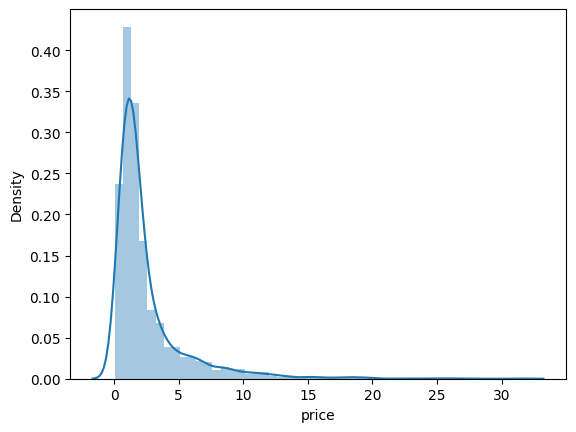

In [7]:
# outliers on the basis of price column
sns.distplot(df['price'])

<Axes: xlabel='price'>

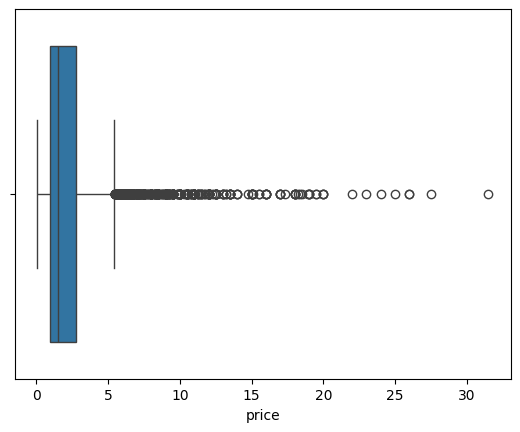

In [8]:
sns.boxplot(x=df['price'])

In [9]:
# Calculate the IQR for the 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers.shape[0]
outliers_price_stats = outliers['price'].describe()

num_outliers, outliers_price_stats

(425,
 count    425.000000
 mean       9.235624
 std        4.065259
 min        5.460000
 25%        6.460000
 50%        8.000000
 75%       10.750000
 max       31.500000
 Name: price, dtype: float64)

In [10]:
outliers.sort_values('price',ascending=False).head(20)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type
821,house,arjun marg/ sector- 26 phase- 1/ golf course road,sector 26,31.50,35000.0,9000.0,Plot area 1000(836.13 sq.m.),7,9,3+,"pooja room,store room,study room,servant room",3.0,North-East,Moderately Old,"['Guru dronacharya metro station', 'Dlf phase ...","['1 Water Purifier', '15 Fan', '1 Fridge', '1 ...","['Feng Shui / Vaastu Compliant', 'Private Gard...",NaN,9000.0,NaN,1,1,1,1,0,0
2834,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,"pooja room,study room,servant room,others",3.0,North-East,Relatively New,"['Huda city centre metro station', 'New Life C...","['1 Water Purifier', '6 Fan', '1 Exhaust Fan',...","['Feng Shui / Vaastu Compliant', 'Private Gard...",NaN,11286.0,NaN,1,1,0,1,1,2
2488,house,dlf city plots,sector 26,26.00,57206.0,4545.0,Plot area 505(422.24 sq.m.),6,7,3+,"pooja room,study room,servant room,others",2.0,North-East,New Property,"['Phase 2 Metro Station', 'Grand Mall', 'Jacar...","['12 Fan', '1 Exhaust Fan', '6 Geyser', '1 Sto...","['Security / Fire Alarm', 'Feng Shui / Vaastu ...",NaN,4545.0,NaN,1,1,0,1,1,2
2211,house,independent,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,"servant room,study room,pooja room,store room",4.0,North-West,New Property,"['Guru dronacharya metro station', 'Dlf phase ...","['1 Water Purifier', '26 Fan', '1 Exhaust Fan'...","['Feng Shui / Vaastu Compliant', 'Private Gard...",NaN,400.0,350.0,1,1,1,1,0,2
1686,house,suncity township,sector 54,25.00,31111.0,8036.0,Plot area 1000(836.13 sq.m.),4,4,3+,"study room,pooja room,servant room,store room",2.0,North,Moderately Old,"['Sector 54 chowk metro station', 'Sector metr...",NaN,NaN,NaN,1000.0,NaN,1,1,1,1,0,1
3046,house,emaar the palm springs,sector 54,24.00,600000.0,400.0,Plot area 400(37.16 sq.m.),5,5,2,"pooja room,study room,servant room",1.0,North-East,Old Property,"['Sector 53-54 Metro Station', 'Central Plaza ...","['8 Fan', '1 Exhaust Fan', '7 Geyser', '32 Lig...","['Security / Fire Alarm', 'Feng Shui / Vaastu ...",NaN,400.0,NaN,1,1,0,1,0,2
2765,house,independent,sector 26,23.00,25556.0,9000.0,Plot area 1000(836.13 sq.m.),4,4,3+,"study room,pooja room,store room,servant room",2.0,South-West,Relatively New,"['Guru dronacharya metro station', 'Dlf phase ...","['7 Fan', '1 Exhaust Fan', '5 Geyser', '1 Stov...","['Security / Fire Alarm', 'Feng Shui / Vaastu ...",NaN,9000.0,NaN,1,1,1,1,0,2
2667,house,vipul tatvam villa,sector 48,22.00,26667.0,8250.0,Plot area 1000(836.13 sq.m.),5,6,3,servant room,3.0,NaN,Moderately Old,"['Athena', 'Star Mall', 'The Sixth Element Sch...","['5 Wardrobe', '6 Fan', '10 Light', '6 AC', 'N...","['Private Garden / Terrace', 'Maintenance Staf...",NaN,1000.0,NaN,0,1,0,0,0,1
711,house,independent,sector 26,20.00,44444.0,4500.0,Plot area 500(418.06 sq.m.),5,7,3+,"servant room,pooja room",3.0,West,Relatively New,"['Guru dronacharya metro station', 'Dlf phase ...","['1 Water Purifier', '16 Fan', '1 Fridge', '1 ...","['Security / Fire Alarm', 'Private Garden / Te...",NaN,4500.0,NaN,0,1,0,1,0,0
2096,house,luxury dlf city floors,sector 26,20.00,48889.0,4091.0,Plot area 500(418.06 sq.m.),16,16,3+,servant room,4.0,NaN,New Property,"['Sikandarpur metro station', 'Sikanderpur met...","['16 Wardrobe', '26 Fan', '1 Exhaust Fan', '16...","['High Ceiling Height', 'Park', 'Visitor Parki...",NaN,500.0,NaN,0,1,0,0,0,2


In [11]:
# on the basis of price col we can say that there are some genuine outliers but there are some data erros as well

### Price_per_sqft

C:\Users\MI\AppData\Local\Temp\ipykernel_7196\2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

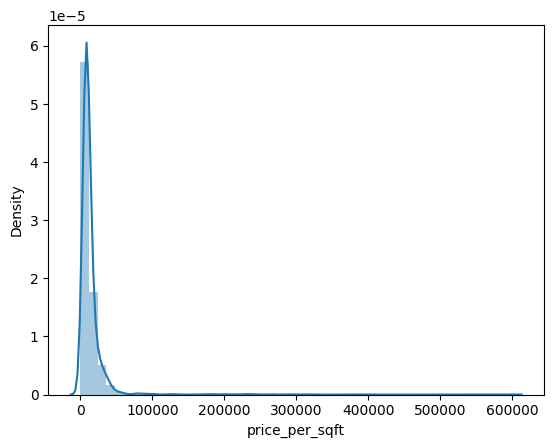

In [12]:
sns.distplot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

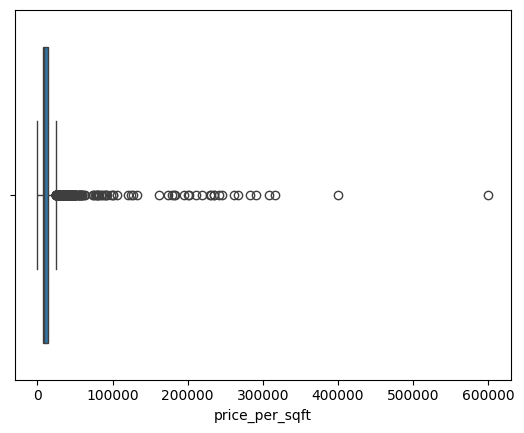

In [13]:
sns.boxplot(x=df['price_per_sqft'])

In [14]:
# Calculate the IQR for the 'price' column
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_sqft = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers_sqft.shape[0]
outliers_sqft_stats = outliers_sqft['price_per_sqft'].describe()

num_outliers, outliers_sqft_stats

(353,
 count       353.000000
 mean      52672.226629
 std       61218.883253
 min       24500.000000
 25%       28233.000000
 50%       33404.000000
 75%       42032.000000
 max      600000.000000
 Name: price_per_sqft, dtype: float64)

In [15]:
outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x)

C:\Users\MI\AppData\Local\Temp\ipykernel_7196\205471443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x)


In [16]:
outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])

C:\Users\MI\AppData\Local\Temp\ipykernel_7196\3686006548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])


In [17]:
outliers_sqft['price_per_sqft'].describe()

count      353.000000
mean     29371.696884
std      12417.964865
min       2723.000000
25%      25562.000000
50%      29880.000000
75%      35556.000000
max      82540.000000
Name: price_per_sqft, dtype: float64

In [18]:
df.update(outliers_sqft)

C:\Users\MI\AppData\Local\Temp\ipykernel_7196\4262394064.py:1: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.update(outliers_sqft)
C:\Users\MI\AppData\Local\Temp\ipykernel_7196\4262394064.py:1: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.update(outliers_sqft)
C:\Users\MI\AppData\Local\Te

C:\Users\MI\AppData\Local\Temp\ipykernel_7196\2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

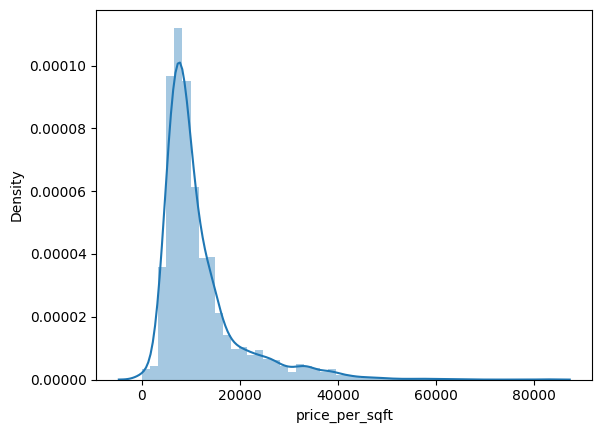

In [19]:
sns.distplot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

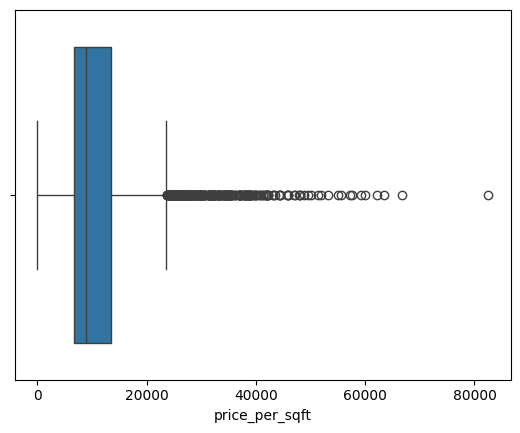

In [20]:
sns.boxplot(x=df['price_per_sqft'])

In [21]:
df[df['price_per_sqft']>50000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type
386,house,cloudnine cottages,sohna road road,5.50,55000.0,1000.0,Plot area 1000(92.9 sq.m.),3,3,0,not available,1.0,NaN,Moderately Old,"['Rajiv Chowk Mosque', 'Standard chartered ATM...",[],NaN,NaN,1000.0,NaN,0,0,0,0,0,1
671,house,emaar mgf marbella,sector 66,18.00,55556.0,3240.0,Plot area 360(301.01 sq.m.),4,4,3+,"pooja room,study room,servant room",3.0,East,Moderately Old,"['Sector 55-56 Rapid Metro Station', 'HUB 66',...","['1 Water Purifier', '16 Fan', '1 Fridge', '1 ...","['High Ceiling Height', 'Maintenance Staff', '...",NaN,3240.0,NaN,1,1,0,1,0,0
1200,house,independent,sector 26,14.75,51864.0,2844.0,Plot area 316(264.22 sq.m.),16,20,3+,"pooja room,study room,servant room,store room",4.0,East,New Property,"['Guru dronacharya metro station', 'Dlf phase ...","['1 Exhaust Fan', '1 Microwave', '7 AC', '1 Mo...","['Security / Fire Alarm', 'Feng Shui / Vaastu ...",NaN,2844.0,NaN,1,1,1,1,0,2
1261,house,independent,sector 25,16.00,59259.0,2700.0,Plot area 350(292.64 sq.m.)Built Up area: 325 ...,16,16,3+,"servant room,study room,pooja room,store room",4.0,West,New Property,"['Vodafone belvedere towers metro station', 'D...","['1 Water Purifier', '24 Fan', '1 Exhaust Fan'...","['Feng Shui / Vaastu Compliant', 'Private Gard...",NaN,325.0,300.0,1,1,1,1,0,2
1349,flat,unitech vistas,sector 70,9.00,57508.0,1565.0,Built Up area: 1565 (145.39 sq.m.),3,3,0,not available,7.0,NaN,Undefined,"['Airia Mall', 'Delhi Ajmer Highway', 'Sohna R...",NaN,NaN,NaN,1565.0,NaN,0,0,0,0,0,1
1425,house,project housing board colony,sector 31,8.00,63492.0,1260.0,Built Up area: 140 (117.06 sq.m.),2,1,0,not available,1.0,NaN,Undefined,"['Rajiv Chowk Mosque', 'Icici bank ATM', 'Stat...","['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'N...",NaN,NaN,140.0,NaN,0,0,0,0,0,1
1640,house,emaar the palm springs,sector 54,14.00,62222.0,2250.0,Plot area 250(209.03 sq.m.),4,5,3+,"study room,servant room",2.0,North,Old Property,"['Sector 53-54 Metro Station', 'Central Plaza ...","['5 Fan', '1 Exhaust Fan', '5 Geyser', '1 Wash...","['Centrally Air Conditioned', 'Water purifier'...",NaN,2250.0,NaN,1,1,0,0,0,2
1839,house,unitech escape,sector 50,10.80,60000.0,1800.0,Plot area 290(242.48 sq.m.)Built Up area: 250 ...,4,4,3,"servant room,study room,pooja room,store room",2.0,North,Relatively New,"['Sector 55-56 Metro Station', 'Airia Mall', '...","['5 Wardrobe', '6 Fan', '1 Exhaust Fan', '4 Ge...","['Feng Shui / Vaastu Compliant', 'Private Gard...",NaN,250.0,200.0,1,1,1,1,0,2
2211,house,independent,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,"servant room,study room,pooja room,store room",4.0,North-West,New Property,"['Guru dronacharya metro station', 'Dlf phase ...","['1 Water Purifier', '26 Fan', '1 Exhaust Fan'...","['Feng Shui / Vaastu Compliant', 'Private Gard...",NaN,400.0,350.0,1,1,1,1,0,2
2290,house,malibu towne,sector 47,8.50,53125.0,1600.0,Built Up area: 1600 (148.64 sq.m.),12,12,3+,not available,4.0,North,New Property,"['Standard chartered ATM', 'Icici bank ATM', '...","['12 Wardrobe', '12 Fan', '1 Exhaust Fan', '10...","['Feng Shui / Vaastu Compliant', 'Private Gard...",NaN,1600.0,NaN,0,0,0,0,0,2


In [22]:
df = df[df['price_per_sqft'] <= 50000]

<Axes: xlabel='price_per_sqft'>

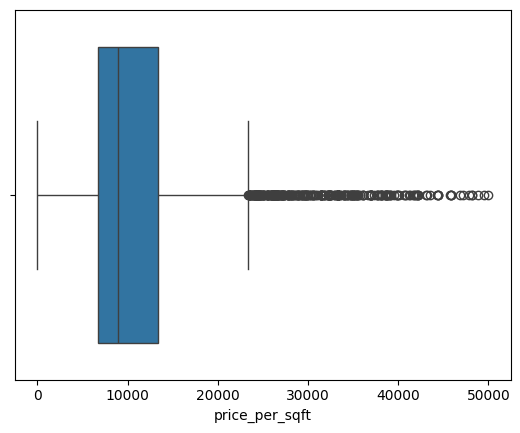

In [23]:
sns.boxplot(x=df['price_per_sqft'])

### Area

C:\Users\MI\AppData\Local\Temp\ipykernel_7196\91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

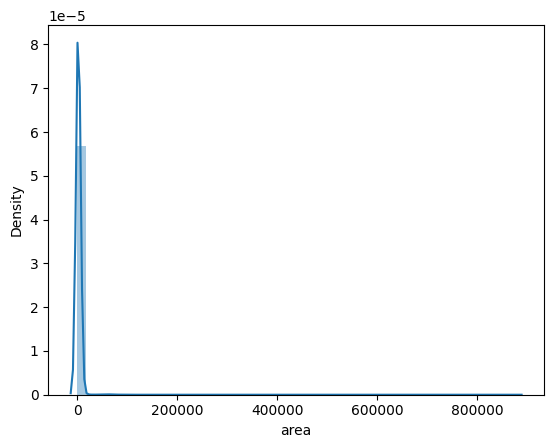

In [24]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

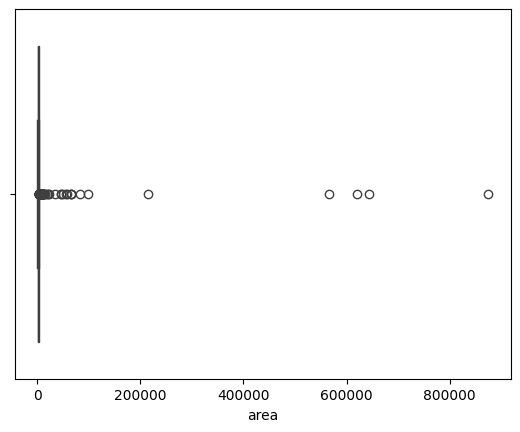

In [25]:
sns.boxplot(x=df['area'])

In [26]:
df['area'].describe()

count      3651.000000
mean       2946.039715
std       23195.534593
min         145.000000
25%        1262.000000
50%        1750.000000
75%        2347.000000
max      875000.000000
Name: area, dtype: float64

In [27]:
df[df['area'] > 100000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type
1638,flat,signature global solera 2,sector 107,0.51,9.0,566667.0,Carpet area: 514396 (47788.95 sq.m.),2,2,1,not available,3.0,North,New Property,"['Dwarka Expressway', 'Delhi', 'IGI Airport']",NaN,"['Security / Fire Alarm', 'Intercom Facility',...",NaN,NaN,514396.0,0,0,0,0,0,1
1648,flat,hcbs sports ville,sohna road,0.35,4.0,875000.0,Built Up area: 737147 (68483.2 sq.m.),2,2,2,not available,8.0,NaN,Relatively New,"['The roadside cafe', 'GD Goenka Mess', 'ROyal...","['1 Water Purifier', '1 Fridge', '1 Fan', '1 G...","['Security / Fire Alarm', 'Intercom Facility',...",NaN,737147.0,NaN,0,0,0,0,0,0
2111,flat,signature the roselia,sector 95,0.45,7.0,642857.0,Carpet area: 569243 (52884.41 sq.m.),2,2,2,not available,2.0,South-West,New Property,"['Newtown Square Mall', 'Pataudi Road', 'Dwark...",NaN,"['Security / Fire Alarm', 'Lift(s)', 'Maintena...",NaN,NaN,569243.0,0,0,0,0,0,1
2651,flat,ramsons kshitij,sector 95,0.31,5.0,620000.0,Carpet area: 607936 (56479.1 sq.m.),2,2,1,"study room,others",1.0,North-East,Relatively New,"['Yadav Clinic', 'Bangali Clinic', 'Dr. J. S. ...",NaN,"['Feng Shui / Vaastu Compliant', 'Security / F...",NaN,NaN,607936.0,1,0,0,0,1,1
3021,house,independent,sector 50,5.00,232.0,215517.0,Plot area 2(1011.71 sq.m.),6,5,3+,"pooja room,study room,servant room,others",2.0,NaN,New Property,"['Standard chartered ATM', 'Icici bank ATM', '...","['1 Fan', '1 Exhaust Fan', '1 Dining Table', '...",NaN,NaN,2.0,NaN,1,1,0,1,1,2


In [28]:
df = df[df['area'] < 100000]

C:\Users\MI\AppData\Local\Temp\ipykernel_7196\91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

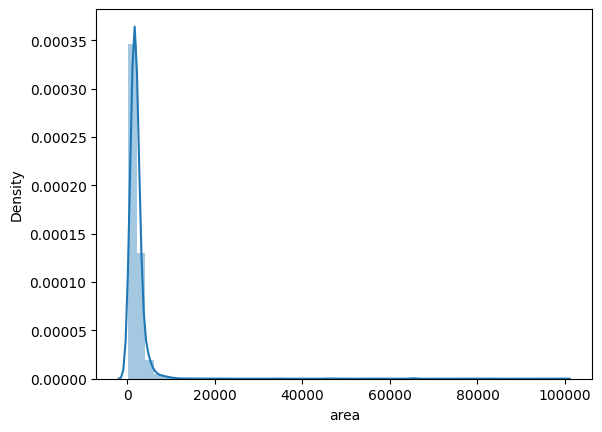

In [29]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

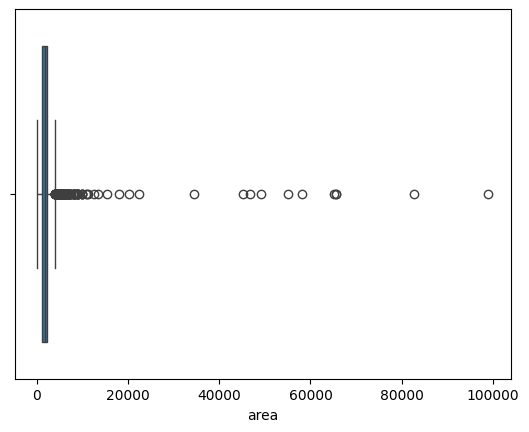

In [30]:
sns.boxplot(x=df['area'])

In [31]:
df[df['area'] > 10000].sort_values('area',ascending=False)

# 818, 1796, 1123, 2, 2356, 115, 3649, 2503, 1471

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type
818,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6,8,3+,"pooja room,store room,servant room",4.0,South,Relatively New,"['Guru dronacharya metro station', 'Dlf phase ...","['6 Wardrobe', '16 Fan', '1 Exhaust Fan', '8 G...","['Feng Shui / Vaastu Compliant', 'Private Gard...",NaN,NaN,11000.00,0,1,1,1,0,2
48,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10,6,2,others,3.0,South-East,Old Property,"['Hanuman Mandir', 'Sheetla Mata Mandir', 'Lot...","['1 Fan', '1 Light', '2 Wardrobe', 'No AC', 'N...","['Water Storage', 'Waste Disposal']",NaN,115.0,NaN,0,0,0,0,1,1
1796,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2,2,2,study room,10.0,East,New Property,"['Metro', 'Dwarka Expressway', 'Rajeev Chowk',...",NaN,"['Intercom Facility', 'Lift(s)', 'Park']",NaN,NaN,64529.00,1,0,0,0,0,1
1123,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3,2,1,not available,12.0,North,Relatively New,"['Metro', 'Dwarka Expressway', 'Rajeev Chowk',...",NaN,"['Intercom Facility', 'Lift(s)', 'Maintenance ...",NaN,NaN,64412.00,0,0,0,0,0,1
300,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10,10,3+,not available,1.0,NaN,Undefined,"['Dlf phase 1 metro station', 'Huda city centr...","['1 Light', 'No AC', 'No Bed', 'No Chimney', '...",NaN,NaN,NaN,7250.00,0,0,0,0,0,1
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,not available,0.0,NaN,Under Construction,"['V3S Sapphire Ninety Mall', 'Sector 86 Road',...",[],"['Intercom Facility', 'Lift(s)', 'Park']",NaN,NaN,58141.00,0,0,0,0,0,1
2356,flat,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2,2,1,not available,13.0,South-West,Relatively New,"['Metro', 'Dwarka Expressway', 'Rajeev Chowk',...",NaN,"['Security / Fire Alarm', 'Intercom Facility',...",NaN,NaN,54917.00,0,0,0,0,0,1
115,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1,1,2,study room,1.0,North-West,Relatively New,"['Signature Global Infinity Mall', 'Sohna Road...",NaN,"['Security / Fire Alarm', 'Lift(s)', 'Maintena...",NaN,NaN,48811.00,1,0,0,0,0,1
2666,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9,9,2,"servant room,store room",3.0,North-West,Relatively New,"['Vodafone belvedere towers metro station', 'D...","['12 Fan', '1 Exhaust Fan', '28 Light', '1 Mod...","['Feng Shui / Vaastu Compliant', 'High Ceiling...",NaN,5800.0,5200.00,0,1,1,0,0,2
3649,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2,2,1,others,10.0,North-West,Relatively New,"['Bangali Clinic', 'Yadav Clinic', 'Dr. J. S. ...",NaN,"['Feng Shui / Vaastu Compliant', 'Intercom Fac...",NaN,NaN,45966.00,0,0,0,0,1,1


In [32]:
df.drop(index=[818, 1796, 1123, 2, 2356, 115, 3649, 2503, 1471], inplace=True)

In [33]:
df[df['area'] > 10000].sort_values('area',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type
48,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10,6,2,others,3.0,South-East,Old Property,"['Hanuman Mandir', 'Sheetla Mata Mandir', 'Lot...","['1 Fan', '1 Light', '2 Wardrobe', 'No AC', 'N...","['Water Storage', 'Waste Disposal']",NaN,115.0,NaN,0,0,0,0,1,1
300,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10,10,3+,not available,1.0,NaN,Undefined,"['Dlf phase 1 metro station', 'Huda city centr...","['1 Light', 'No AC', 'No Bed', 'No Chimney', '...",NaN,NaN,NaN,7250.00,0,0,0,0,0,1
2666,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9,9,2,"servant room,store room",3.0,North-West,Relatively New,"['Vodafone belvedere towers metro station', 'D...","['12 Fan', '1 Exhaust Fan', '28 Light', '1 Mod...","['Feng Shui / Vaastu Compliant', 'High Ceiling...",NaN,5800.0,5200.00,0,1,1,0,0,2
1358,house,independent,sector 57,6.25,2778.0,22498.0,Plot area 3100(2591.99 sq.m.)Built Up area: 26...,9,9,3+,servant room,3.0,North-East,New Property,"['Chhattarpur Mandir Complex', 'Temple', 'Masj...","['9 Wardrobe', '1 Water Purifier', '12 Fan', '...","['Private Garden / Terrace', 'Water purifier',...",NaN,2660.0,2500.00,0,1,0,0,0,2
3195,house,independent,sector 43,5.50,2716.0,20250.0,Plot area 215(179.77 sq.m.)Built Up area: 2850...,8,7,3+,"pooja room,study room,servant room,others",3.0,East,Moderately Old,"['Huda city centre metro station', 'New Life C...","['8 Wardrobe', '10 Fan', '1 Exhaust Fan', '10 ...","['Private Garden / Terrace', 'Water purifier',...",NaN,2850.0,2250.00,1,1,0,1,1,2
2131,flat,godrej air,sector 85,2.50,1379.0,18129.0,Carpet area: 18122 (1683.59 sq.m.),4,5,3+,"pooja room,study room,others",16.0,North-East,Under Construction,"['Sapphire 83 Mall', 'Sector 86 Road', 'Dwarka...","['4 Wardrobe', '1 Water Purifier', '4 Fan', '1...","['Security / Fire Alarm', 'Intercom Facility',...",NaN,NaN,18122.00,1,0,0,1,1,2
3088,house,unitech aspen greens,sector 50,6.95,4490.0,15479.0,Plot area 240(200.67 sq.m.)Built Up area: 2160...,3,3,1,servant room,2.0,North-East,Moderately Old,"['Standard chartered ATM', 'Icici bank ATM', '...","['7 Light', '1 Modular Kitchen', 'No AC', 'No ...","['Centrally Air Conditioned', 'Water purifier'...",NaN,2160.0,1720.00,0,1,0,0,0,1
3444,flat,godrej icon,sector 88a,1.75,1384.0,12645.0,Carpet area: 1175.11,3,3,3+,not available,6.0,NaN,New Property,"['JMS Crosswalk', ""Saint Paul's School"", 'Indu...",[],NaN,NaN,NaN,1175.11,0,0,0,0,0,1
2834,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,"pooja room,study room,servant room,others",3.0,North-East,Relatively New,"['Huda city centre metro station', 'New Life C...","['1 Water Purifier', '6 Fan', '1 Exhaust Fan',...","['Feng Shui / Vaastu Compliant', 'Private Gard...",NaN,11286.0,NaN,1,1,0,1,1,2
2342,flat,m3m golfestate,sector 65,13.20,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,servant room,13.0,North,Moderately Old,"['Sector 54 Chowk Metro Station', 'Sahara Mall...","['4 Fan', '8 Light', 'No AC', 'No Bed', 'No Ch...","['Power Back-up', 'Intercom Facility', 'Lift(s...",NaN,NaN,11000.00,0,1,0,0,0,1


In [34]:
df.loc[48,'area'] = 115*9
df.loc[300,'area'] = 7250
df.loc[2666,'area'] = 5800
df.loc[1358,'area'] = 2660
df.loc[3195,'area'] = 2850
df.loc[2131,'area'] = 1812
df.loc[3088,'area'] = 2160
df.loc[3444,'area'] = 1175

C:\Users\MI\AppData\Local\Temp\ipykernel_7196\91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

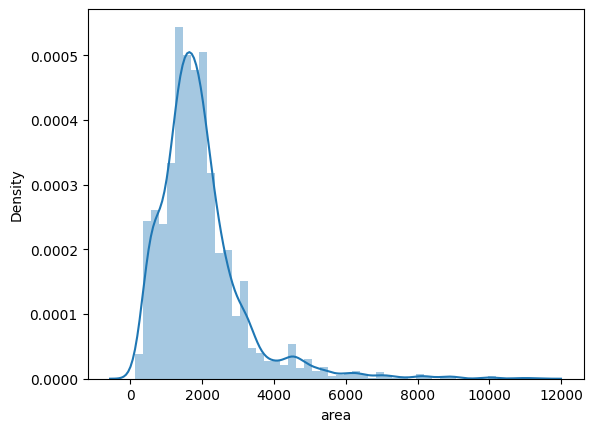

In [35]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

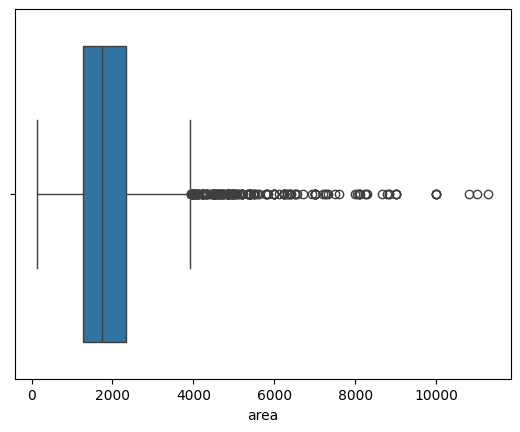

In [36]:
sns.boxplot(x=df['area'])

In [37]:
df['area'].describe()

count     3637.000000
mean      1949.763541
std       1215.267472
min        145.000000
25%       1260.000000
50%       1746.000000
75%       2325.000000
max      11286.000000
Name: area, dtype: float64

### Bedroom

C:\Users\MI\AppData\Local\Temp\ipykernel_7196\1691983684.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])


<Axes: xlabel='bedRoom', ylabel='Density'>

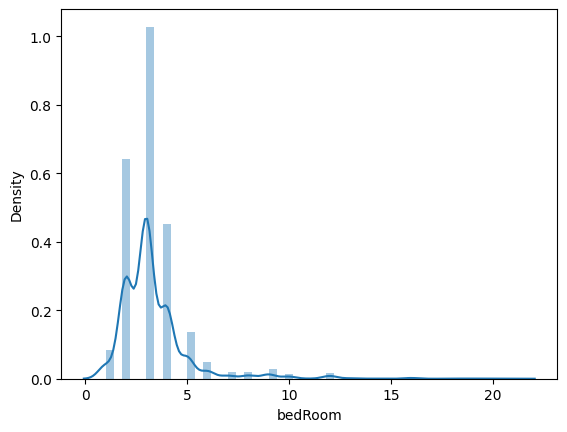

In [38]:
sns.distplot(df['bedRoom'])

<Axes: xlabel='bedRoom'>

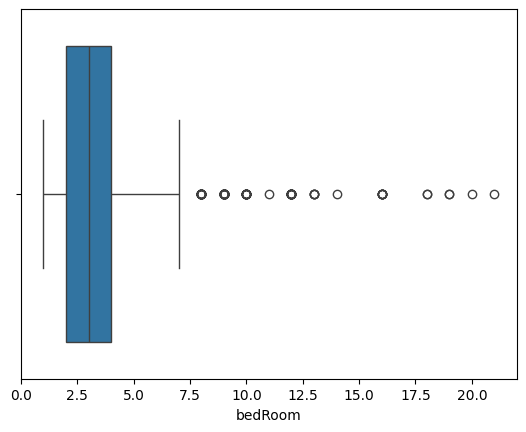

In [39]:
sns.boxplot(x=df['bedRoom'])

In [40]:
df['bedRoom'].describe()

count    3637.000000
mean        3.332967
std         1.829187
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        21.000000
Name: bedRoom, dtype: float64

In [41]:
df[df['bedRoom'] > 10].sort_values('bedRoom',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type
3618,house,independent,sector 54,5.00,43066.0,1161.0,Plot area 129(107.86 sq.m.),21,21,3+,servant room,5.0,North,Relatively New,"['Sector 53-54 metro station', 'Sector 54 chow...","['1 Water Purifier', '21 Fan', '1 Fridge', '1 ...","['Feng Shui / Vaastu Compliant', 'Private Gard...",NaN,1161.0,NaN,0,1,0,0,0,0
2611,house,independent,sector 43,4.50,39062.0,1152.0,Plot area 128(107.02 sq.m.),20,20,3+,servant room,4.0,East,Relatively New,"['Huda city centre metro station', 'New Life C...","['1 Water Purifier', '1 Fridge', '20 Fan', '1 ...","['Water Storage', 'Park', 'Visitor Parking', '...",NaN,1152.0,NaN,0,1,0,0,0,0
78,house,independent,sector 17a,3.87,5160.0,7500.0,Plot area 1623(150.78 sq.m.)Built Up area: 750...,19,17,3+,"study room,store room",5.0,North-West,Relatively New,"['Iffco chowk metro station', 'Citi bank ATM',...",NaN,"['False Ceiling Lighting', 'Water Storage', 'N...",NaN,7500.0,NaN,1,0,1,0,0,1
1493,house,independent,sector 17a,3.93,24214.0,1623.0,Plot area 1623(150.78 sq.m.)Built Up area: 162...,19,17,3,"study room,servant room,store room,pooja room",4.0,North-West,Relatively New,"['Iffco chowk metro station', 'Citi bank ATM',...",NaN,"['Feng Shui / Vaastu Compliant', 'Private Gard...",NaN,1622.0,NaN,1,1,1,1,0,1
19,house,independent,sector 54,5.50,38194.0,1440.0,Plot area 160(133.78 sq.m.),18,18,3+,servant room,4.0,South-West,Relatively New,"['Sector 54 chowk metro station', 'Sector metr...","['1 Water Purifier', '22 Fan', '1 Fridge', '1 ...","['Feng Shui / Vaastu Compliant', 'High Ceiling...",NaN,1440.0,NaN,0,1,0,0,0,0
1381,house,private house,sector 55,7.05,46906.0,1503.0,Plot area 167(139.63 sq.m.),18,18,3+,others,4.0,North-East,Relatively New,"['Iffco chowk metro station', 'Mg road metro s...","['18 Fan', '1 Fridge', '1 Exhaust Fan', '21 Ge...","['Feng Shui / Vaastu Compliant', 'Security / F...",NaN,1503.0,NaN,0,0,0,0,1,0
3457,house,independent,sector 56,12.39,45889.0,2700.0,Plot area 300(250.84 sq.m.),16,18,3+,"pooja room,servant room",4.0,North-East,New Property,"['Sector metro station', 'Sector metro station...","['4 Fan', '1 Exhaust Fan', '3 Geyser', '1 Stov...","['Feng Shui / Vaastu Compliant', 'Private Gard...",NaN,2700.0,NaN,0,1,0,1,0,2
2137,house,independent,sector 40,12.00,38986.0,3078.0,Plot area 342(285.96 sq.m.),16,16,3+,"pooja room,study room,servant room,store room",4.0,NaN,New Property,"['Huda city centre metro station', 'Axis bank ...","['20 Wardrobe', '24 Fan', '18 Geyser', '99 Lig...",NaN,NaN,3078.0,NaN,1,1,1,1,0,2
2096,house,luxury dlf city floors,sector 26,20.00,48888.0,4091.0,Plot area 500(418.06 sq.m.),16,16,3+,servant room,4.0,NaN,New Property,"['Sikandarpur metro station', 'Sikanderpur met...","['16 Wardrobe', '26 Fan', '1 Exhaust Fan', '16...","['High Ceiling Height', 'Park', 'Visitor Parki...",NaN,500.0,NaN,0,1,0,0,0,2
2039,house,independent,sector 43,13.50,50000.0,2700.0,Plot area 300(250.84 sq.m.),16,16,3+,"pooja room,study room,servant room,others",4.0,North-West,Relatively New,"['Huda city centre metro station', 'New Life C...",NaN,"['Feng Shui / Vaastu Compliant', 'Private Gard...",NaN,2700.0,NaN,1,1,0,1,1,1


In [42]:
df = df[df['bedRoom'] <= 10]

In [43]:
df.shape

(3592, 26)

C:\Users\MI\AppData\Local\Temp\ipykernel_7196\1691983684.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])


<Axes: xlabel='bedRoom', ylabel='Density'>

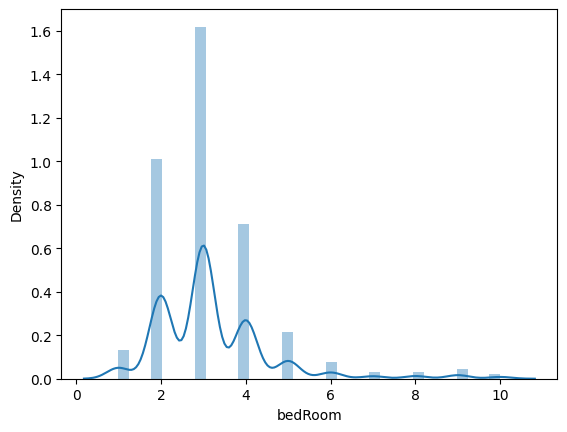

In [44]:
sns.distplot(df['bedRoom'])

<Axes: xlabel='bedRoom'>

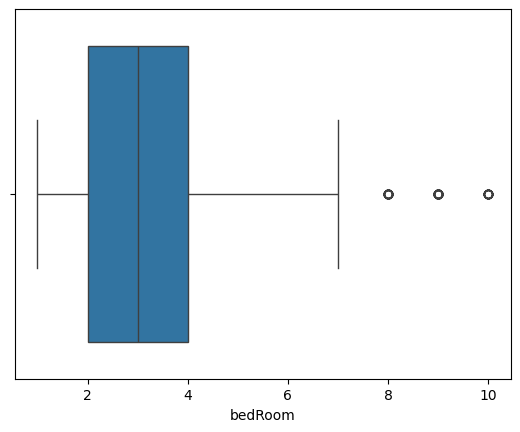

In [45]:
sns.boxplot(x=df['bedRoom'])

In [46]:
df['bedRoom'].describe()

count    3592.000000
mean        3.203229
std         1.393349
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: bedRoom, dtype: float64

### Bathroom

C:\Users\MI\AppData\Local\Temp\ipykernel_7196\2904465235.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bathroom'])


<Axes: xlabel='bathroom', ylabel='Density'>

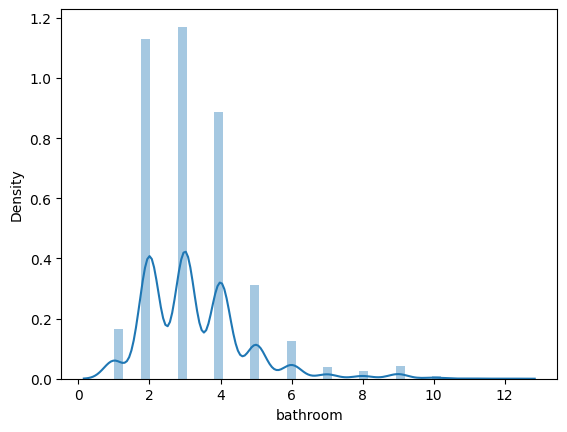

In [47]:
sns.distplot(df['bathroom'])

<Axes: xlabel='bathroom'>

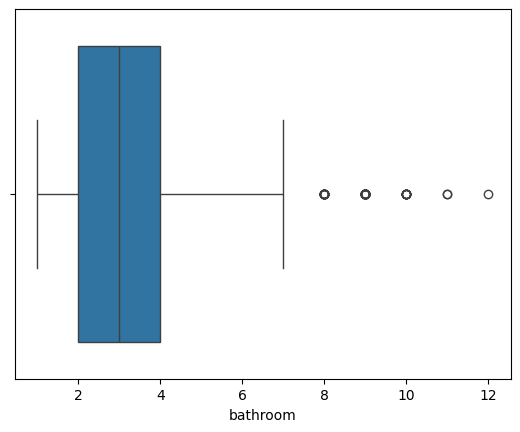

In [48]:
sns.boxplot(x=df['bathroom'])

In [49]:
df[df['bathroom'] > 10].sort_values('bathroom',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type
3267,house,adani brahma samsara,sector 60,18.02,28200.0,6390.0,Built Up area: 6390 (593.65 sq.m.),9,12,3+,servant room,3.0,North-East,Relatively New,"['Sector 55-56 Rapid Metro', 'Paras Trinity Ma...","['1 Exhaust Fan', '12 Geyser', '12 AC', '1 Mod...","['Security / Fire Alarm', 'Feng Shui / Vaastu ...",NaN,6390.0,NaN,0,1,0,0,0,2
2771,house,independent,sector 39,7.00,10000.0,7000.0,Plot area 350(32.52 sq.m.)Built Up area: 7000 ...,10,11,3+,pooja room,4.0,South-East,Relatively New,"['Rajiv Chowk Mosque', 'State bank of india AT...","['1 Water Purifier', '38 Fan', '1 Exhaust Fan'...","['Security / Fire Alarm', 'Water purifier', 'H...",NaN,7000.0,NaN,0,0,0,1,0,2
2816,house,independent,sector 24,11.00,28902.0,3806.0,Plot area 3806.45(353.63 sq.m.)Built Up area: ...,8,11,3+,"pooja room,study room,servant room,others",3.0,East,Old Property,NaN,"['8 Wardrobe', '12 Fan', '1 Exhaust Fan', '8 G...","['Private Garden / Terrace', 'Swimming Pool', ...",NaN,5000.0,NaN,1,1,0,1,1,2


In [50]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,not available,2.0,NaN,New Property,"['Sector 55-56 Metro Station', 'The Leaf Mall ...",NaN,"['Lift(s)', 'Park']",1081.0,NaN,650.0,0,0,0,0,0,1
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,"study room,servant room",4.0,NaN,New Property,"['Sant Soordas Sihi Metro Station', 'Airia Mal...",NaN,"['Power Back-up', 'Intercom Facility', 'Lift(s...",NaN,NaN,1103.0,1,1,0,0,0,1
3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,not available,17.0,NaN,New Property,"['Huda City Centre', 'Omaxe City Centre', 'Nin...",[],"['Feng Shui / Vaastu Compliant', 'Security / F...",NaN,1000.0,585.0,0,0,0,0,0,1
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,"servant room,others",10.0,North-West,Relatively New,"['Sapphire 93 Mall', 'Dwarka Expressway', 'NH-...","['3 Wardrobe', '6 Fan', '1 Exhaust Fan', '3 Ge...","['Centrally Air Conditioned', 'Water purifier'...",1995.0,1615.0,1476.0,0,1,0,0,1,2
5,flat,suncity avenue,sector 102,0.48,9022.0,532.0,Super Built up area 632(58.71 sq.m.)Carpet are...,2,2,1,store room,5.0,North-East,Relatively New,"['The Hive', 'JMS Marine Square', 'Gurugram Rd...","['3 Fan', '10 Light', 'No AC', 'No Bed', 'No C...","['Centrally Air Conditioned', 'Water purifier'...",632.0,NaN,532.0,0,0,1,0,0,1


### super built up area

C:\Users\MI\AppData\Local\Temp\ipykernel_7196\4184943455.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['super_built_up_area'])


<Axes: xlabel='super_built_up_area', ylabel='Density'>

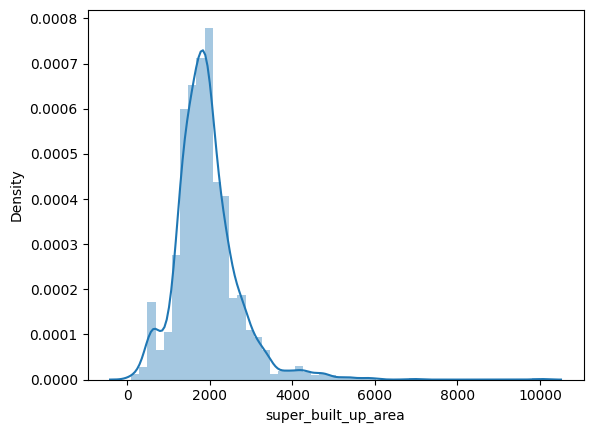

In [51]:
sns.distplot(df['super_built_up_area'])

<Axes: xlabel='super_built_up_area'>

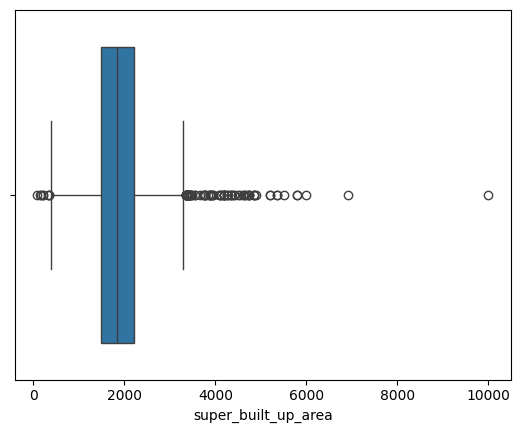

In [52]:
sns.boxplot(x=df['super_built_up_area'])

In [53]:
df['super_built_up_area'].describe()

count     1876.000000
mean      1924.557862
std        764.535501
min         89.000000
25%       1478.750000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

In [54]:
df[df['super_built_up_area'] > 6000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type
1323,flat,bestech park view grand spa,sector 81,4.7,6786.0,6926.0,Super Built up area 6926(643.45 sq.m.),4,4,3+,servant room,19.0,North,Relatively New,"['Sapphire 83 Mall', 'NH-8, IMT Manesar', 'Dwa...","['4 Wardrobe', '1 Exhaust Fan', '4 Geyser', '4...","['Security / Fire Alarm', 'Power Back-up', 'Pr...",6926.0,NaN,NaN,0,1,0,0,0,2
3265,flat,krrish provence estate,gwal pahari,7.5,7500.0,10000.0,Super Built up area 10000(929.03 sq.m.),5,6,3+,"pooja room,servant room,others",23.0,North-East,Relatively New,"['Tniy Toons School', 'Pathways School Gurgoan...",NaN,"['Feng Shui / Vaastu Compliant', 'Security / F...",10000.0,NaN,NaN,0,1,0,1,1,1


### built up area

C:\Users\MI\AppData\Local\Temp\ipykernel_7196\3494228458.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['built_up_area'])


<Axes: xlabel='built_up_area', ylabel='Density'>

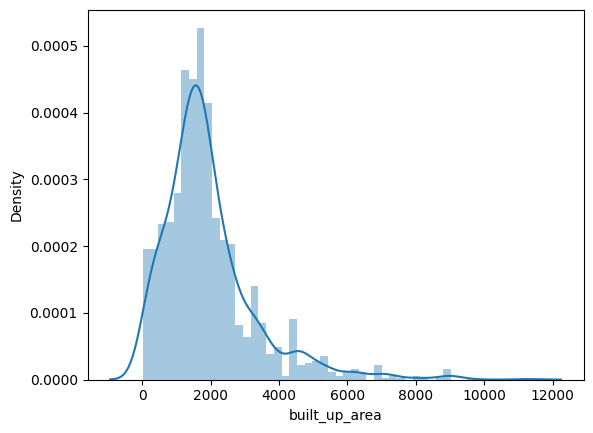

In [55]:
sns.distplot(df['built_up_area'])

<Axes: xlabel='built_up_area'>

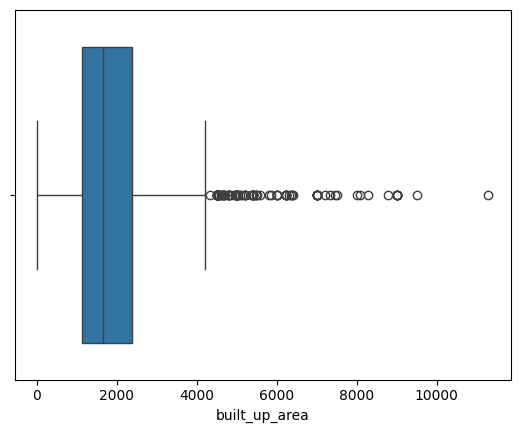

In [56]:
sns.boxplot(x=df['built_up_area'])

In [57]:
df[df['built_up_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type
2834,house,independent,sector 43,27.5,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,"pooja room,study room,servant room,others",3.0,North-East,Relatively New,"['Huda city centre metro station', 'New Life C...","['1 Water Purifier', '6 Fan', '1 Exhaust Fan',...","['Feng Shui / Vaastu Compliant', 'Private Gard...",NaN,11286.0,NaN,1,1,0,1,1,2


### carpet area

C:\Users\MI\AppData\Local\Temp\ipykernel_7196\3905767603.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['carpet_area'])


<Axes: xlabel='carpet_area', ylabel='Density'>

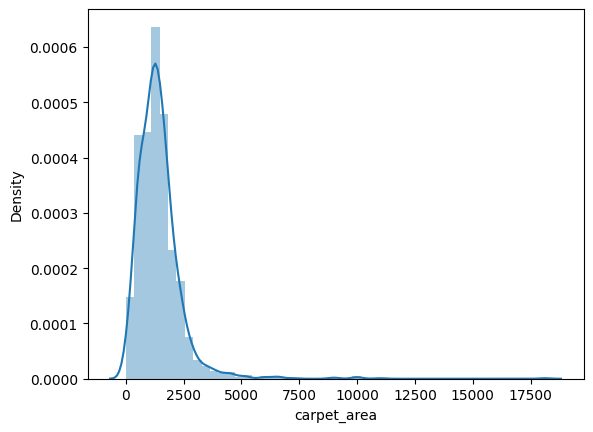

In [58]:
sns.distplot(df['carpet_area'])

<Axes: xlabel='carpet_area'>

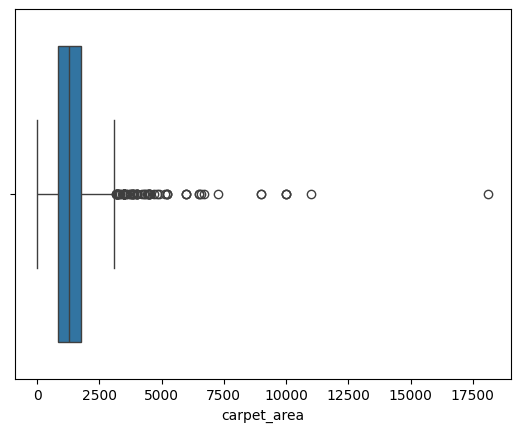

In [59]:
sns.boxplot(x=df['carpet_area'])

In [60]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type
2131,flat,godrej air,sector 85,2.5,1379.0,1812.0,Carpet area: 18122 (1683.59 sq.m.),4,5,3+,"pooja room,study room,others",16.0,North-East,Under Construction,"['Sapphire 83 Mall', 'Sector 86 Road', 'Dwarka...","['4 Wardrobe', '1 Water Purifier', '4 Fan', '1...","['Security / Fire Alarm', 'Intercom Facility',...",NaN,NaN,18122.0,1,0,0,1,1,2
2342,flat,m3m golfestate,sector 65,13.2,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,servant room,13.0,North,Moderately Old,"['Sector 54 Chowk Metro Station', 'Sahara Mall...","['4 Fan', '8 Light', 'No AC', 'No Bed', 'No Ch...","['Power Back-up', 'Intercom Facility', 'Lift(s...",NaN,NaN,11000.0,0,1,0,0,0,1


In [61]:
df.loc[2131,'carpet_area'] = 1812

In [62]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type
2342,flat,m3m golfestate,sector 65,13.2,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,servant room,13.0,North,Moderately Old,"['Sector 54 Chowk Metro Station', 'Sahara Mall...","['4 Fan', '8 Light', 'No AC', 'No Bed', 'No Ch...","['Power Back-up', 'Intercom Facility', 'Lift(s...",NaN,NaN,11000.0,0,1,0,0,0,1


In [63]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,not available,2.0,NaN,New Property,"['Sector 55-56 Metro Station', 'The Leaf Mall ...",NaN,"['Lift(s)', 'Park']",1081.0,NaN,650.0,0,0,0,0,0,1
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,"study room,servant room",4.0,NaN,New Property,"['Sant Soordas Sihi Metro Station', 'Airia Mal...",NaN,"['Power Back-up', 'Intercom Facility', 'Lift(s...",NaN,NaN,1103.0,1,1,0,0,0,1
3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,not available,17.0,NaN,New Property,"['Huda City Centre', 'Omaxe City Centre', 'Nin...",[],"['Feng Shui / Vaastu Compliant', 'Security / F...",NaN,1000.0,585.0,0,0,0,0,0,1
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,"servant room,others",10.0,North-West,Relatively New,"['Sapphire 93 Mall', 'Dwarka Expressway', 'NH-...","['3 Wardrobe', '6 Fan', '1 Exhaust Fan', '3 Ge...","['Centrally Air Conditioned', 'Water purifier'...",1995.0,1615.0,1476.0,0,1,0,0,1,2
5,flat,suncity avenue,sector 102,0.48,9022.0,532.0,Super Built up area 632(58.71 sq.m.)Carpet are...,2,2,1,store room,5.0,North-East,Relatively New,"['The Hive', 'JMS Marine Square', 'Gurugram Rd...","['3 Fan', '10 Light', 'No AC', 'No Bed', 'No C...","['Centrally Air Conditioned', 'Water purifier'...",632.0,NaN,532.0,0,0,1,0,0,1


In [65]:
sns.distplot(df['luxury_score'])

KeyError: 'luxury_score'

C:\Users\Nitish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='luxury_score'>

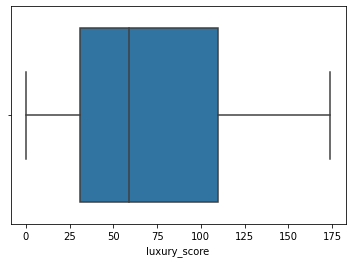

In [229]:
sns.boxplot(df['luxury_score'])

In [230]:
df.shape

(3588, 24)

In [234]:
df['price_per_sqft'] = round((df['price']*10000000)/df['area'])

In [235]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,15
0,flat,signature global park 4,sector 36,0.82,7586.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3.0,2.0,2,2.0,NaN,New Property,1081.0,NaN,650.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,NaN
1,flat,smart world gems,sector 89,0.95,8597.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2.0,2.0,2,4.0,NaN,New Property,NaN,NaN,1103.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0,NaN
3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2.0,2.0,1,17.0,NaN,New Property,NaN,1000.0,585.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,NaN
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3.0,4.0,3+,10.0,North-West,Relatively New,1995.0,1615.0,1476.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0,NaN
5,flat,suncity avenue,sector 102,0.48,9023.0,532.0,Super Built up area 632(58.71 sq.m.)Carpet are...,2.0,2.0,1,5.0,North-East,Relatively New,632.0,NaN,532.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0,NaN


C:\Users\Nitish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price_per_sqft', ylabel='Density'>

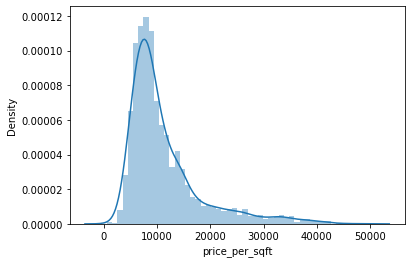

In [236]:
sns.distplot(df['price_per_sqft'])

C:\Users\Nitish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_per_sqft'>

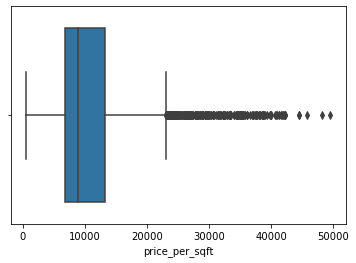

In [237]:
sns.boxplot(df['price_per_sqft'])

In [240]:
df[df['price_per_sqft'] > 42000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,15
711,house,independent,sector 26,20.0,44444.0,4500.0,Plot area 500(418.06 sq.m.),5.0,7.0,3+,3.0,West,Relatively New,NaN,4500.0,NaN,0.0,1.0,0.0,1.0,0.0,2.0,97.0,NaN
901,house,independent,sector 28,12.0,42194.0,2844.0,Plot area 316(264.22 sq.m.),4.0,5.0,3+,4.0,East,Relatively New,NaN,2844.0,NaN,0.0,1.0,1.0,1.0,0.0,1.0,60.0,NaN
1090,house,independent,sector 105,9.9,49500.0,2000.0,Built Up area: 2000 (185.81 sq.m.)Carpet area:...,2.0,2.0,2,3.0,North,Undefined,NaN,2000.0,1800.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1509,house,independent,sector 55,5.0,44444.0,1125.0,Plot area 125(104.52 sq.m.)Built Up area: 115 ...,9.0,9.0,3+,5.0,East,New Property,NaN,115.0,100.0,0.0,0.0,0.0,0.0,1.0,1.0,44.0,NaN
1526,house,dlf city plots,sector 26,19.0,42054.0,4518.0,Plot area 502(419.74 sq.m.),6.0,6.0,3,2.0,East,Relatively New,NaN,4518.0,NaN,1.0,1.0,0.0,0.0,0.0,1.0,121.0,NaN
2040,house,independent,sector 43,9.5,42222.0,2250.0,Plot area 302(252.51 sq.m.)Built Up area: 300 ...,5.0,5.0,3+,2.0,North-East,Relatively New,NaN,300.0,250.0,0.0,1.0,0.0,1.0,0.0,1.0,88.0,NaN
2130,house,independent,sector 26,19.0,42222.0,4500.0,Plot area 500(418.06 sq.m.),6.0,8.0,3+,3.0,East,Moderately Old,NaN,4500.0,NaN,1.0,1.0,1.0,1.0,0.0,1.0,103.0,NaN
3054,house,sushant lok 1 builder floors,sector 43,13.0,48148.0,2700.0,Plot area 300(250.84 sq.m.),3.0,3.0,3+,4.0,North,New Property,NaN,2700.0,NaN,0.0,0.0,0.0,1.0,0.0,1.0,7.0,NaN
3108,house,independent,sector 25,13.0,45710.0,2844.0,Plot area 316(264.22 sq.m.),6.0,8.0,3+,NaN,NaN,Relatively New,NaN,2844.0,NaN,1.0,1.0,1.0,1.0,0.0,2.0,0.0,NaN


In [256]:
x = df[df['price_per_sqft'] <= 20000]
(x['area']/x['bedRoom']).quantile(0.02)

183.33333333333334

In [259]:
df[(df['area']/df['bedRoom'])<183]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,15
37,house,independent,sector 104,0.45,12162.0,370.0,Plot area 370(34.37 sq.m.)Carpet area: 1500 sq...,4.0,4.0,2,4.0,North,Moderately Old,NaN,NaN,1500.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,NaN
48,house,ganpati heights apartment,sector 13,1.25,12077.0,1035.0,Plot area 115(7692.86 sq.m.),10.0,6.0,2,3.0,South-East,Old Property,NaN,115.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,7.0,NaN
93,house,independent,sector 105,1.10,12222.0,900.0,Carpet area: 900 (83.61 sq.m.),6.0,4.0,1,1.0,South-West,Undefined,NaN,NaN,900.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
99,house,independent,sector 4,1.10,11111.0,990.0,Built Up area: 990 (91.97 sq.m.),6.0,4.0,1,2.0,North,Undefined,NaN,990.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
186,house,independent,sector 13,1.50,11538.0,1300.0,Plot area 1300(120.77 sq.m.),10.0,7.0,3,4.0,East,Moderately Old,NaN,1300.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3686,house,independent,sector 12,0.90,13333.0,675.0,Built Up area: 675 (62.71 sq.m.),4.0,4.0,0,2.0,NaN,Undefined,NaN,675.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3713,house,independent,sector 41,4.25,26235.0,1620.0,Plot area 180(150.5 sq.m.),10.0,9.0,3+,4.0,North,Moderately Old,NaN,1620.0,NaN,1.0,1.0,0.0,0.0,0.0,1.0,36.0,NaN
3751,house,independent,sector 21,0.45,8411.0,535.0,Carpet area: 535 (49.7 sq.m.),3.0,2.0,1,1.0,NaN,Undefined,NaN,NaN,535.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3774,house,independent,sector 28,0.45,10000.0,450.0,Built Up area: 50 (4.65 sq.m.),5.0,3.0,0,1.0,NaN,Undefined,NaN,50.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
